## Load the libraries and sort functions

In [127]:
# import standard libraries

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.mlab as mlab
import numpy as np
import os
import csv
import scipy
import pandas as pd 
import json
import collections
from scipy import stats
from statistics import mean, stdev
from math import sqrt
from numpy.polynomial.polynomial import polyfit
import math
import sklearn
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import manifold
from sklearn import clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cluster import KMeans

from matplotlib.ticker import NullFormatter
from matplotlib.colors import ListedColormap
from time import time

# Plotting options
%matplotlib inline

# Change parameters of the Figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size    

matplotlib.rcParams.update({'font.size': 9})


In [128]:

# Change parameters of the Figure size
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size    


## Load the JSON files

In [129]:

# scan the directory for JSON files

########  WG1 part  ########

# get the json file list
json_file_list=list()
WG1_path="./Data/WG1/"

for file in os.listdir(WG1_path):
    if file.endswith(".json"):
        json_file_list.append(os.path.join(file))

# dictionary to save the results
all_cells_WG1={}

# open the first json file
file_path=str(WG1_path)+str(json_file_list[0])
with open(file_path) as data_file:    
    data = json.load(data_file)

# record the empty lists based on the first file
for i in range(len(data['genome'])):        
    name=str(data['genome'][i]['section']) +str('_') +str(data['genome'][i]['name'])
    all_cells_WG1[name]=[]


# fill the elements of the list
for j in range(len(json_file_list)):
# open the json file
    file_path=str(WG1_path)+str(json_file_list[j])
    with open(file_path) as data_file:    
        data = json.load(data_file)
    # add open values
    for i in range(len(data['genome'])):        
        name=str(data['genome'][i]['section']) +str('_') +str(data['genome'][i]['name'])
        all_cells_WG1[name].append(float(data['genome'][i]['value']))


In [130]:
# create the cell names list

cell_names = json_file_list


In [131]:
# Show the results for WG1 by feature name

all_cells_WG1_sorted = collections.OrderedDict(sorted(all_cells_WG1.items()))

# determine length by the first value
print 'Total number of WG1 cells: ' + str(len(all_cells_WG1_sorted['apical_Ra']))
all_cells_WG1_sorted


Total number of WG1 cells: 120


OrderedDict([('apic_brat_Cabuffer',
              [74.6612265665,
               78.5413986906,
               83.6147652365,
               27.7340124949,
               68.0663263688,
               61.9069406604,
               69.3657635687,
               76.8054414872,
               70.4228349634,
               26.3307746808,
               106.010731538,
               82.6775007335,
               94.4191777394,
               110.440758151,
               34.6858424087,
               8.05759991343,
               84.3826388493,
               79.9049187924,
               69.2303797528,
               0.660238844717,
               83.8710743939,
               77.5916404179,
               46.7267429131,
               40.6753878698,
               83.4510725593,
               96.3614184626,
               97.0679396164,
               29.6640919518,
               28.0816090778,
               3.41858390447,
               51.2106788964,
               65.2620260991,
   

In [132]:

# scan the directory for JSON files

########  WG4 part ########

# get the json file list
json_file_list=list()
WG4_path="./Data/WG4/"

for file in os.listdir(WG4_path):
    if file.endswith(".json"):
        json_file_list.append(os.path.join(file))


# dictionary to save the results
all_cells_WG4={}

# open the first json file
file_path=str(WG4_path)+str(json_file_list[0])
with open(file_path) as data_file:    
    data = json.load(data_file)

# record the empty lists based on the first file
for i in range(len(data['genome'])):        
    name=str(data['genome'][i]['section']) +str('_') +str(data['genome'][i]['name'])
    all_cells_WG4[name]=[]


# fill the elements of the list
for j in range(len(json_file_list)):
# open the json file
    file_path=str(WG4_path)+str(json_file_list[j])
    with open(file_path) as data_file:    
        data = json.load(data_file)
    # add open values
    for i in range(len(data['genome'])):        
        name=str(data['genome'][i]['section']) +str('_') +str(data['genome'][i]['name'])
        all_cells_WG4[name].append(float(data['genome'][i]['value']))


In [133]:
# Show the results for WG4

# sort the dict naturally

all_cells_WG4

all_cells_WG4_sorted = collections.OrderedDict(sorted(all_cells_WG4.items()))

# determine length by the first value
print 'Number of WG4 cells: ' + str(len(all_cells_WG4_sorted['apical_Ra']))
all_cells_WG1_sorted

all_cells_WG4_sorted


Number of WG4 cells: 120


OrderedDict([('apic_brat_Cabuffer',
              [7.98072432672,
               74.0357025624,
               14.3777491861,
               27.9886431393,
               0.565313384616,
               95.8860926063,
               57.1653179339,
               36.2743993341,
               67.5943351224,
               46.5953644161,
               72.7692592179,
               51.7147114234,
               8.24666066899,
               91.4388991594,
               0.734951652698,
               14.3777491861,
               3.24341597707,
               29.5495355284,
               98.4510026086,
               108.783604339,
               72.2280003253,
               93.461961475,
               89.9226011917,
               14.0821562542,
               29.0500294771,
               98.9770107607,
               18.0814963027,
               0.734951652698,
               1.34408420584,
               75.7919314395,
               71.224811751,
               33.1197125622,
   

In [134]:
# add other cells to the cell list

cell_names = cell_names + json_file_list

print 'Updated list (run once)'
print
cell_names


Updated list (run once)



['optim_param_0_1706014110201.json',
 'optim_param_0_1706014110202.json',
 'optim_param_0_1706014110502.json',
 'optim_param_0_1706014110703.json',
 'optim_param_0_1706014110704.json',
 'optim_param_0_1706015210802.json',
 'optim_param_0_1706015210901.json',
 'optim_param_0_1706015210902.json',
 'optim_param_0_1706015210904.json',
 'optim_param_0_1706015210906.json',
 'optim_param_0_1706015210907.json',
 'optim_param_0_1706015211001.json',
 'optim_param_1_1706014110201.json',
 'optim_param_1_1706014110202.json',
 'optim_param_1_1706014110502.json',
 'optim_param_1_1706014110703.json',
 'optim_param_1_1706014110704.json',
 'optim_param_1_1706015210802.json',
 'optim_param_1_1706015210901.json',
 'optim_param_1_1706015210902.json',
 'optim_param_1_1706015210904.json',
 'optim_param_1_1706015210906.json',
 'optim_param_1_1706015210907.json',
 'optim_param_1_1706015211001.json',
 'optim_param_2_1706014110201.json',
 'optim_param_2_1706014110202.json',
 'optim_param_2_1706014110502.json',
 

In [135]:
# remove the values from the list

for i in range(0,len(cell_names)):
    cell_names[i]=cell_names[i][:-5]

cell_names


['optim_param_0_1706014110201',
 'optim_param_0_1706014110202',
 'optim_param_0_1706014110502',
 'optim_param_0_1706014110703',
 'optim_param_0_1706014110704',
 'optim_param_0_1706015210802',
 'optim_param_0_1706015210901',
 'optim_param_0_1706015210902',
 'optim_param_0_1706015210904',
 'optim_param_0_1706015210906',
 'optim_param_0_1706015210907',
 'optim_param_0_1706015211001',
 'optim_param_1_1706014110201',
 'optim_param_1_1706014110202',
 'optim_param_1_1706014110502',
 'optim_param_1_1706014110703',
 'optim_param_1_1706014110704',
 'optim_param_1_1706015210802',
 'optim_param_1_1706015210901',
 'optim_param_1_1706015210902',
 'optim_param_1_1706015210904',
 'optim_param_1_1706015210906',
 'optim_param_1_1706015210907',
 'optim_param_1_1706015211001',
 'optim_param_2_1706014110201',
 'optim_param_2_1706014110202',
 'optim_param_2_1706014110502',
 'optim_param_2_1706014110703',
 'optim_param_2_1706014110704',
 'optim_param_2_1706015210802',
 'optim_param_2_1706015210901',
 'optim_

# Create a dictionary with both WG1 and WG4 cells (24 cells)

In [136]:

# scan the directory for JSON files

########  WG all part ########

# get the json file list
json_file_list=list()
WG_all="./Data/WG_all/"

for file in os.listdir(WG_all):
    if file.endswith(".json"):
        json_file_list.append(os.path.join(file))


# dictionary to save the results
all_cells_WG={}

# open the first json file
file_path=str(WG_all)+str(json_file_list[0])
with open(file_path) as data_file:    
    data = json.load(data_file)

# record the empty lists based on the first file
for i in range(len(data['genome'])):        
    name=str(data['genome'][i]['section']) +str('_') +str(data['genome'][i]['name'])
    all_cells_WG[name]=[]


# fill the elements of the list
for j in range(len(json_file_list)):
# open the json file
    file_path=str(WG_all)+str(json_file_list[j])
    with open(file_path) as data_file:    
        data = json.load(data_file)
    # add open values
    for i in range(len(data['genome'])):        
        name=str(data['genome'][i]['section']) +str('_') +str(data['genome'][i]['name'])
        all_cells_WG[name].append(float(data['genome'][i]['value']))


In [137]:
# Show the results for WG all

# sort the dict naturally

all_cells_WG

all_cells_WG_sorted = collections.OrderedDict(sorted(all_cells_WG.items()))

# determine length by the first value
print 'Number of WG4 cells: ' + str(len(all_cells_WG_sorted['apical_Ra']))
all_cells_WG_sorted


Number of WG4 cells: 24


OrderedDict([('apic_brat_Cabuffer',
              [29.4581728805,
               50.220942055,
               43.5867678532,
               13.6186190556,
               55.1935226434,
               388.608963035,
               388.608963035,
               154.405524473,
               140.308401059,
               515.948284297,
               492.417982111,
               93.2692864063,
               70.2343419887,
               97.7497112758,
               50.7980816102,
               89.991601497,
               25.4098640144,
               106.461600663,
               945.544683714,
               974.655887679,
               74.2565045544,
               479.237670281,
               855.336068889,
               102.267847071]),
             ('apic_g_pas',
              [0.00012575333627,
               2.4674551413e-08,
               2.99496691906e-06,
               2.93185874548e-05,
               4.13207545298e-05,
               2.85454540839e-05,
              

## compute the mean and variance of all parameters

In [138]:

for i in np.arange(len(all_cells_WG_sorted)):
    all_keys=all_cells_WG_sorted.keys()
    print str(all_keys[i]) +str(' min') +str(' max')
    print np.min(all_cells_WG_sorted[all_keys[i]])
    print np.max(all_cells_WG_sorted[all_keys[i]])
    print


apic_brat_Cabuffer min max
13.6186190556
974.655887679

apic_g_pas min max
2.4674551413e-08
0.00012575333627

apic_gbar_Cav12 min max
3.04177409039e-06
0.000226752881512

apic_gbar_Cav13 min max
1.94161629728e-06
0.000172822983153

apic_gbar_Cav22 min max
7.56682447764e-06
0.00395642353009

apic_gbar_Cav32 min max
2.02311633564e-06
0.000310549834406

apic_gbar_HCN min max
1.41549809896e-08
0.000159936662528

apic_gkbar_Kir21 min max
8.18108406065e-06
7.29395027445e-05

apic_gkbar_Kv42 min max
0.00327741227103
0.228060170782

apic_gkbar_SK2 min max
1.52260080013e-06
0.000192536416871

apic_tau_Cabuffer min max
5.28252966628
343.788345808

apical_Ra min max
100.297
998.8363976935221

apical_cm min max
0.10028341334428947
4.994163788036909

apical_e_pas min max
-119.97629791676681
-71.5859

axon_brat_Cabuffer min max
27.4012290781
1004.98430604

axon_g_pas min max
2.49666511361e-06
0.000571761326433

axon_gabkbar_BK_gc min max
0.00242704531277
1.46803002914

axon_gakbar_BK_gc min max
0.00

## Create the data matrix

In [139]:
# Record all feature names (the same in WG1 and WG4!)

# list of empty feature names
feature_names=[]

for key in all_cells_WG1_sorted:
    feature_names.append(key)
    
# number of features studied
n_features = len(feature_names)

print 'Feature names'
feature_names

Feature names


['apic_brat_Cabuffer',
 'apic_g_pas',
 'apic_gbar_Cav12',
 'apic_gbar_Cav13',
 'apic_gbar_Cav22',
 'apic_gbar_Cav32',
 'apic_gbar_HCN',
 'apic_gkbar_Kir21',
 'apic_gkbar_Kv42',
 'apic_gkbar_SK2',
 'apic_tau_Cabuffer',
 'apical_Ra',
 'apical_cm',
 'apical_e_pas',
 'axon_brat_Cabuffer',
 'axon_g_pas',
 'axon_gabkbar_BK_gc',
 'axon_gakbar_BK_gc',
 'axon_gbar_Cav12',
 'axon_gbar_Cav13',
 'axon_gbar_Cav22',
 'axon_gbar_Cav32',
 'axon_gbar_na8st',
 'axon_gkbar_Kir21',
 'axon_gkbar_Kv11',
 'axon_gkbar_Kv14',
 'axon_gkbar_Kv34',
 'axon_gkbar_Kv723',
 'axon_gkbar_SK2',
 'axon_tau_Cabuffer',
 'axonal_Ra',
 'axonal_cm',
 'axonal_e_pas',
 'basal_Ra',
 'basal_cm',
 'basal_e_pas',
 'dend_brat_Cabuffer',
 'dend_g_pas',
 'dend_gbar_Cav12',
 'dend_gbar_Cav13',
 'dend_gbar_Cav22',
 'dend_gbar_Cav32',
 'dend_gbar_HCN',
 'dend_gkbar_Kir21',
 'dend_gkbar_Kv42',
 'dend_gkbar_SK2',
 'dend_tau_Cabuffer',
 'soma_brat_Cabuffer',
 'soma_g_pas',
 'soma_gabkbar_BK_gc',
 'soma_gakbar_BK_gc',
 'soma_gbar_Cav12',
 's

In [140]:
# create the cell type labels

a=np.ones(len(all_cells_WG1_sorted['apical_Ra']))
b=4*np.ones(len(all_cells_WG4_sorted['apical_Ra']))

cell_type=[]
cell_type=np.concatenate((a, b), axis=0)
n_cells=len(cell_type)

print 'Total number of cells: ' + str(len(cell_type))
print
print 'Data labels'
print cell_type


Total number of cells: 240

Data labels
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.]


## Compare differences when all ephys features are taken equally

apical_e_pas
WG1/WG4 ratio
1.2447311667484722

axon_gakbar_BK_gc
WG1/WG4 ratio
1.390322034048594

axon_tau_Cabuffer
WG1/WG4 ratio
1.46106803084098

axonal_Ra
WG1/WG4 ratio
0.36124584353614153

basal_cm
WG1/WG4 ratio
0.9100282349084837

soma_g_pas
WG1/WG4 ratio
24.052789635843997

soma_gabkbar_BK_gc
WG1/WG4 ratio
0.6424586944700843

soma_gbar_Cav22
WG1/WG4 ratio
1.3857616609352856

somatic_cm
WG1/WG4 ratio
1.0151280594929146

somatic_e_pas
WG1/WG4 ratio
1.1398539579987055



Text(0.5,1,'Original feature values')

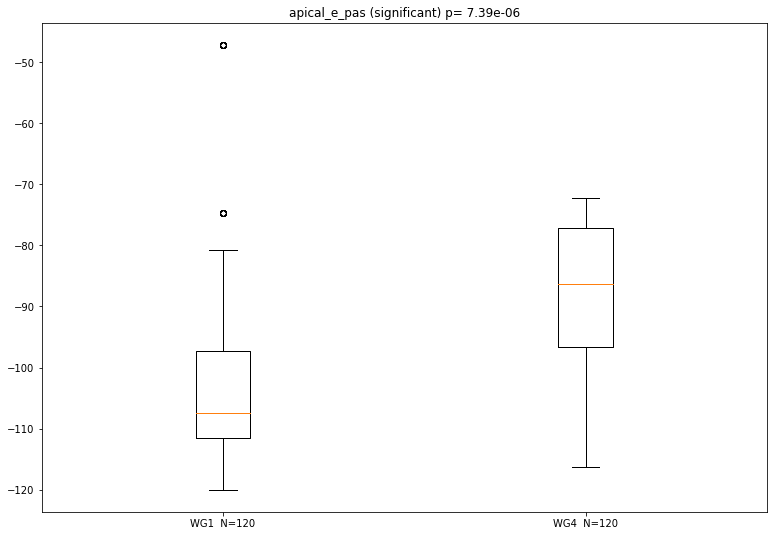

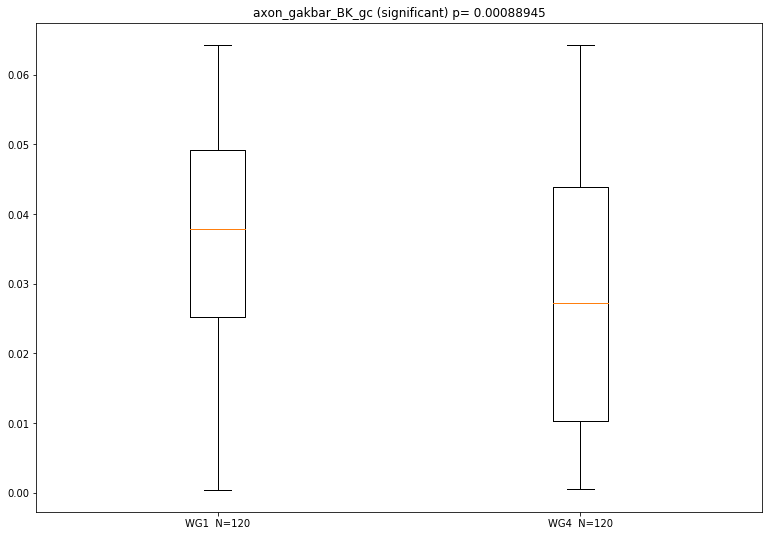

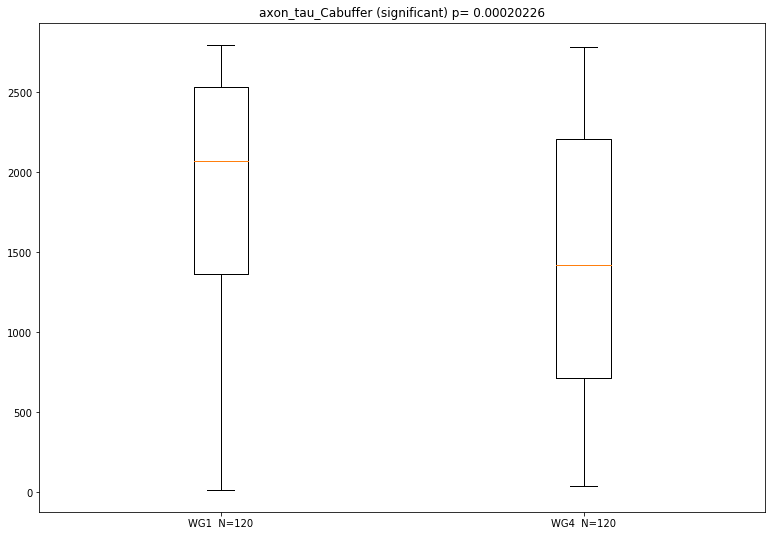

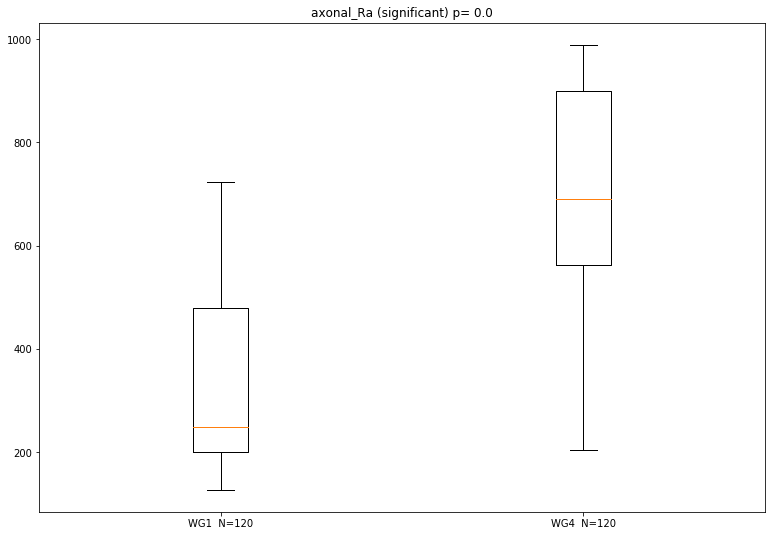

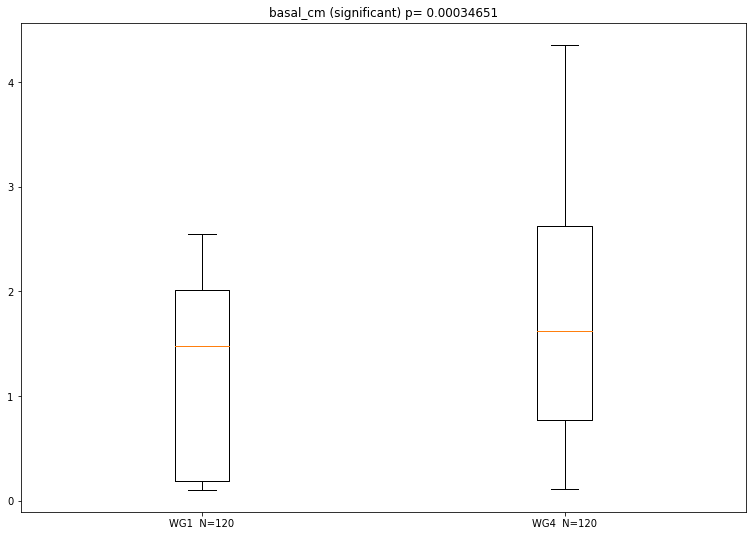

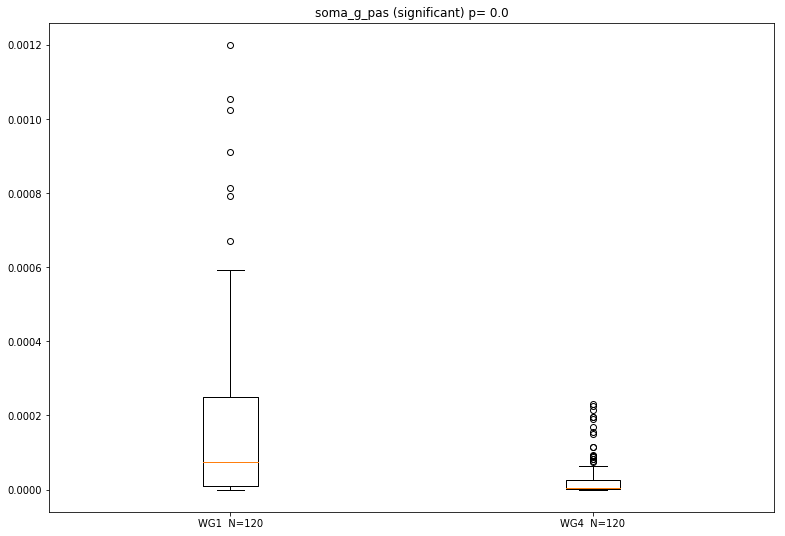

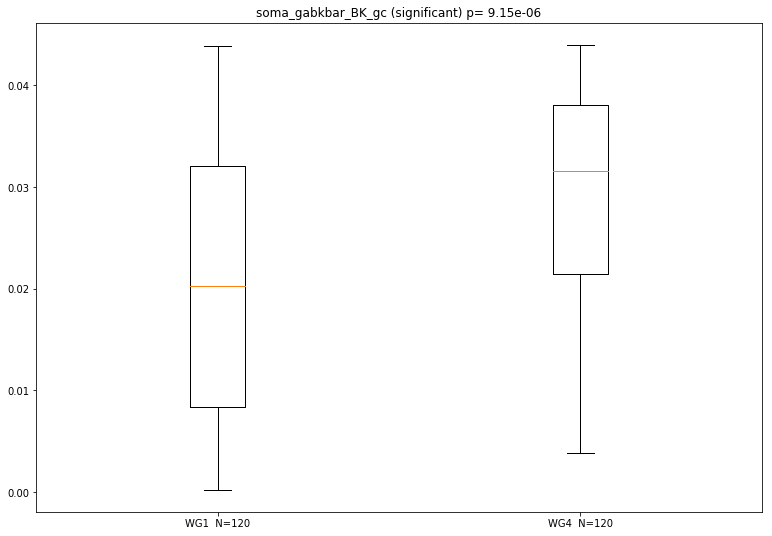

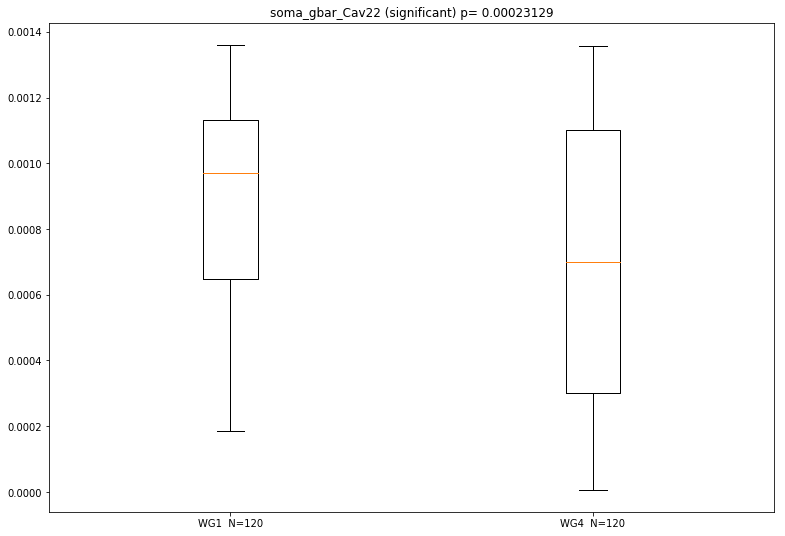

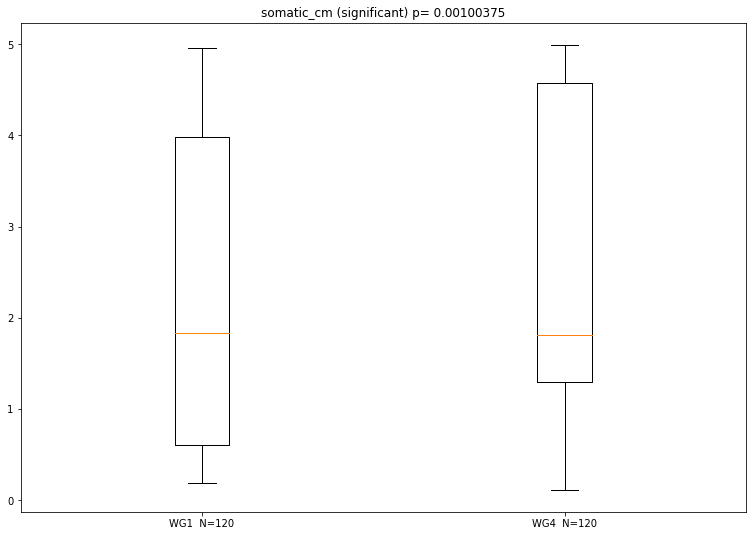

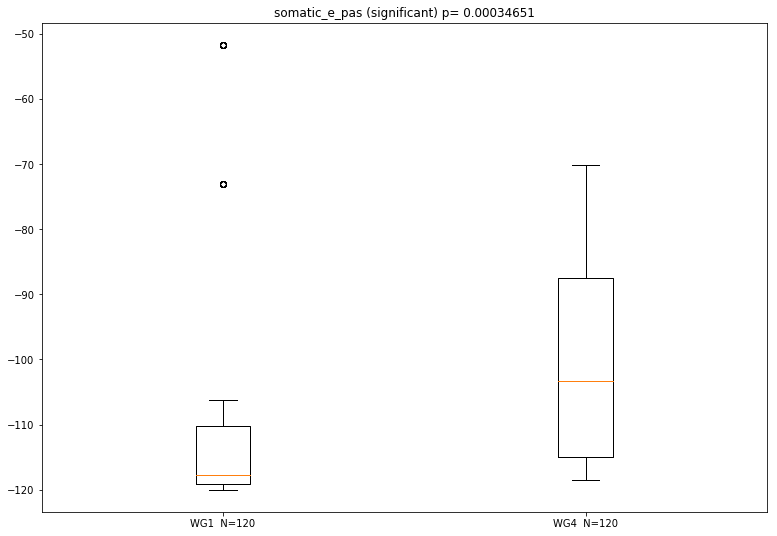

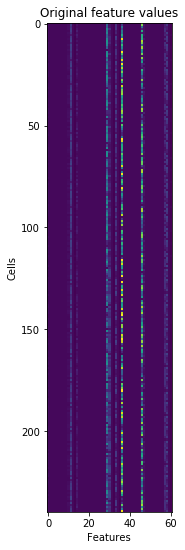

In [141]:

# create the numpy array
all_features = np.zeros(shape=(n_cells,n_features))
# WG1 part
all_features_WG1 = all_features

# counter for the table
k=0

# p-values
p_values = np.zeros(n_features)
matplotlib.rcParams.update({'font.size': 10})

# list for cohens_coefficients and key names
cohens_d=[]
active_cond_keys=[]

# fil the table using dictionaries (keys are the same in both dictionaries)
for key in all_cells_WG4_sorted:
    # concatenate features from WG1 and WG4 cells
    a=all_cells_WG1_sorted[key]
    b=all_cells_WG4_sorted[key]
    c = np.concatenate((a,b),axis=0)
    # write the data from both dictionaries
    all_features[:,k]=c
    
    # Mann Whithney test
#    d, p_values[k] = stats.mannwhitneyu(a,b)
    
    # Wilcoxon test
    d, p_values[k] = stats.wilcoxon(a,b)
    
#    print key
    active_cond_keys.append(key)
#    print 'Cohens Effect size:'
    cohens_d.append(np.abs((mean(a) - mean(b)) / (sqrt((stdev(a) ** 2 + stdev(b) ** 2) / 2))))
    
    if p_values[k]<0.05/(n_features-16):
            fig, ax = plt.subplots()
            print key
            print 'WG1/WG4 ratio'
            print np.median(a)/np.median(b)
            print

            plt.boxplot([a,b],labels=['WG1  '+ str('N=')+str(len(a)), 'WG4  '+ str('N=')+str(len(b))])
            plt.title(key+str(' (significant)') +str(' p= ') +str(np.round(p_values[k],8)))
#            plt.savefig( key +'.eps', format='eps', dpi=300)
    k=k+1
    
#for key in all_cells_WG1_sorted:
fig, ax = plt.subplots()
plt.imshow(all_features)
plt.xlabel('Features')
plt.ylabel('Cells')
plt.title('Original feature values')


([<matplotlib.axis.XTick at 0x1a29ea9990>,
 <a list of 61 Text xticklabel objects>)

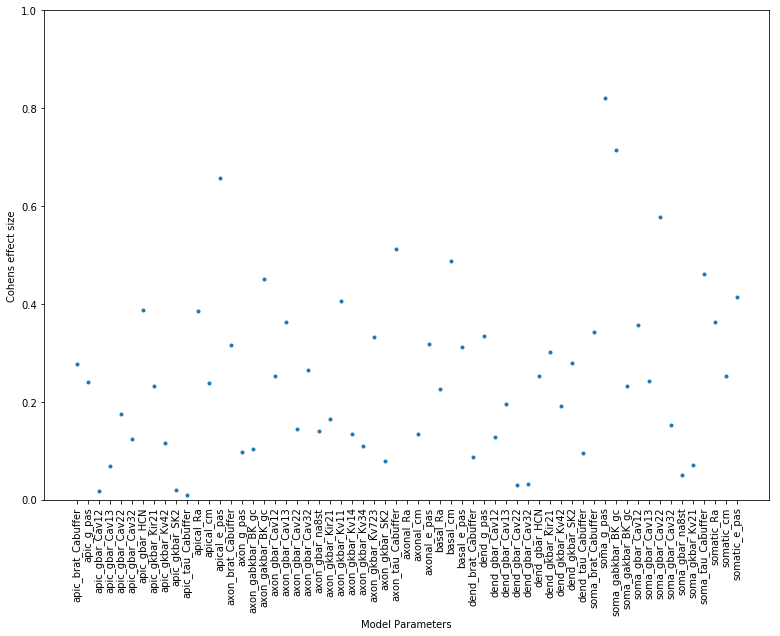

In [126]:
# plot the Cohen's coefficients

plt.plot(cohens_d,'.')
plt.ylim(0,1)
plt.xlabel('Model Parameters')
plt.ylabel('Cohens effect size')
plt.xticks(np.arange(len(cohens_d)), active_cond_keys, rotation = 'vertical')


## Compare only active features

axon_gakbar_BK_gc
Cohens Effect size:
0.008244937552183342
WG1 - WG4 difference in %
-28.074217662506783
WG1/WG4
0.7192578233749322

axon_tau_Cabuffer
Cohens Effect size:
404.750368629381
WG1 - WG4 difference in %
-31.55691734460802
WG1/WG4
0.6844308265539198

dend_gkbar_Kir21
Cohens Effect size:
1.855211020665633e-05
WG1 - WG4 difference in %
-51.752167147367764
WG1/WG4
0.48247832852632233

soma_gabkbar_BK_gc
Cohens Effect size:
0.008587252708896022
WG1 - WG4 difference in %
55.652030022696565
WG1/WG4
1.5565203002269656

soma_gbar_Cav22
Cohens Effect size:
0.00021520299535145713
WG1 - WG4 difference in %
-27.83751865922783
WG1/WG4
0.7216248134077217

soma_tau_Cabuffer
Cohens Effect size:
90.52998691598083
WG1 - WG4 difference in %
22.656139688196323
WG1/WG4
1.2265613968819633



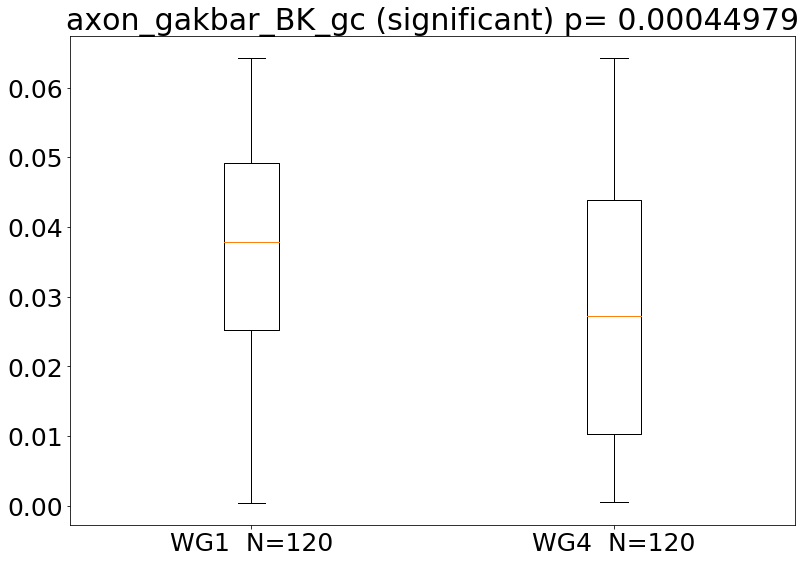

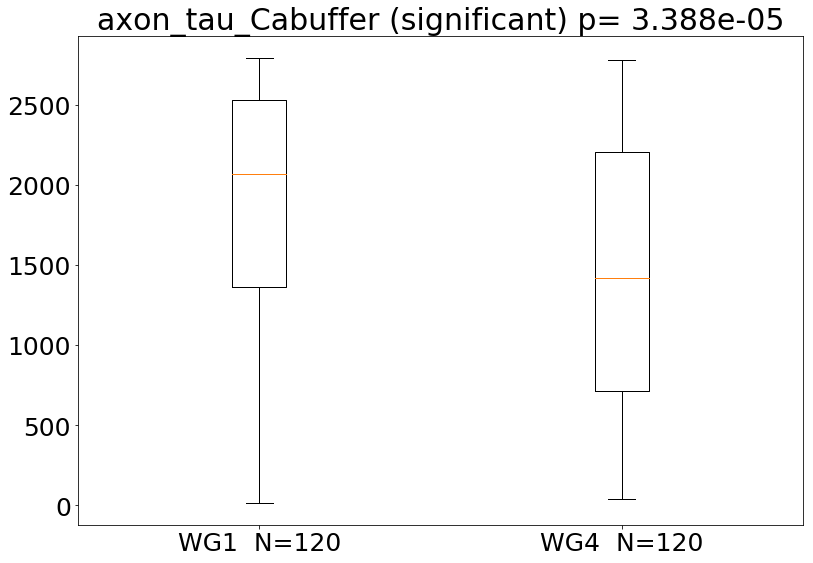

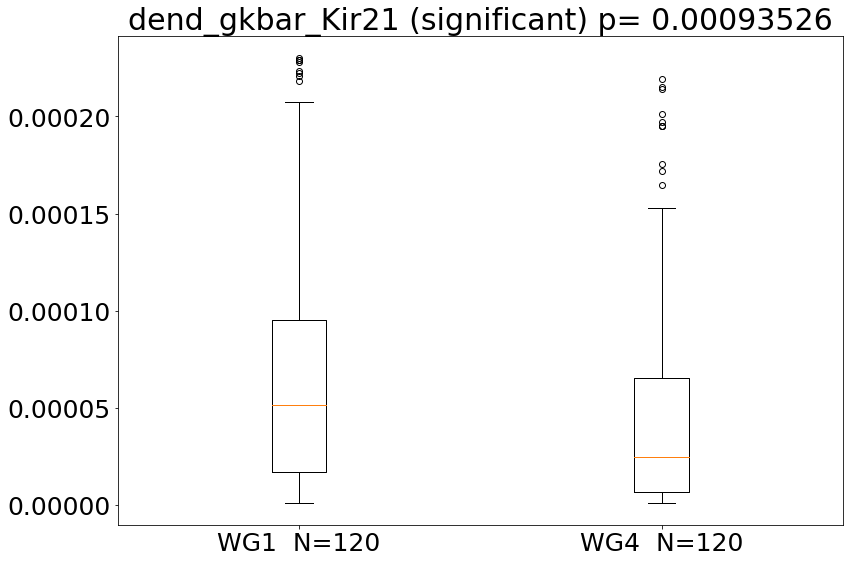

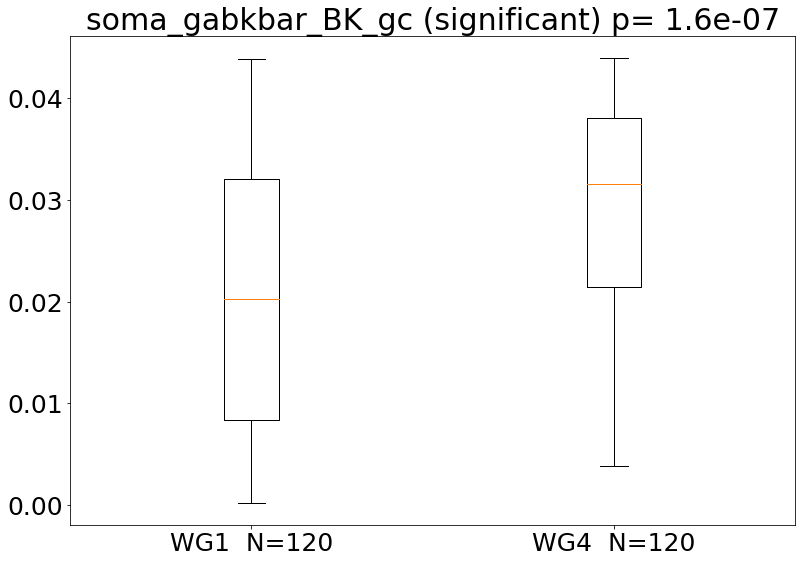

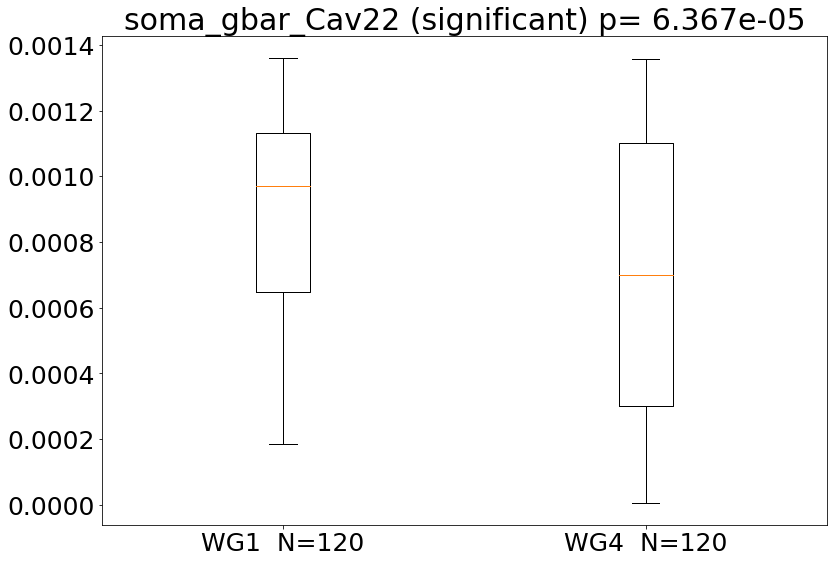

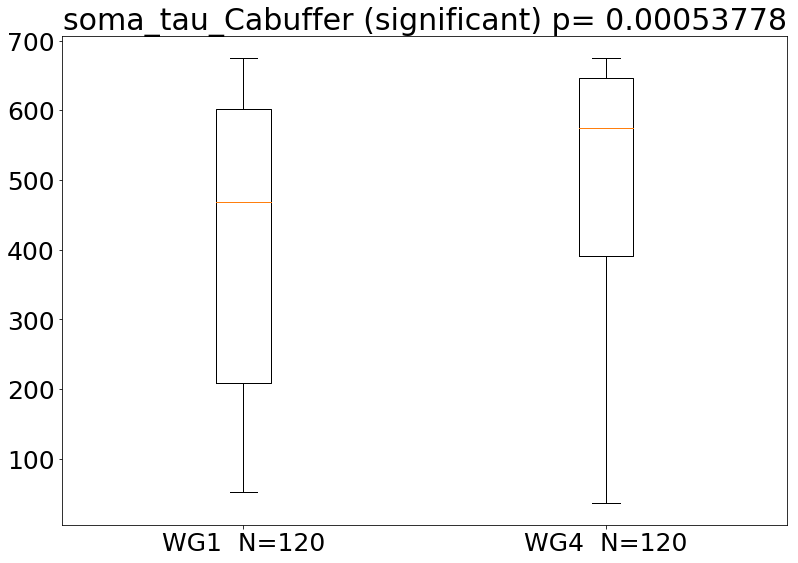

In [142]:

# create the numpy array
all_features_cond = np.zeros(shape=(n_cells,n_features))
# WG1 part
all_features_WG1_cond = all_features

# counter for the table
k=0

# p-values
p_values_active = np.zeros(n_features)
matplotlib.rcParams.update({'font.size': 25})

# list for cohens_coefficients and key names
cohens_d=[]
active_cond_keys=[]

# fil the table using dictionaries (keys are the same in both dictionaries)
for key in all_cells_WG4_sorted:
    
    # check if we consider only active parameters
    if 'e_pas' not in key:
        if 'cm' not in key:
            if 'Ra' not in key:
                if 'g_pas' not in key:                                                
                    # concatenate features from WG1 and WG4 cells
                    a=all_cells_WG1_sorted[key]
                    b=all_cells_WG4_sorted[key]
                    c = np.concatenate((a,b),axis=0)
   
                    # write the data from both dictionaries
                    all_features_cond[:,k]=c

                    # Mann-Whithney test
                    d, p_values_active[k] = stats.mannwhitneyu(a,b)

                    if p_values_active[k]<0.05/(n_features-16):
        
                            print key
                            active_cond_keys.append(key)
                            print 'Cohens Effect size:'
                            cohens_d.append(np.abs((mean(a) - mean(b))))
                           #/ (sqrt((stdev(a) ** 2 + stdev(b) ** 2) / 2))))
                            print cohens_d[-1]
                            print 'WG1 - WG4 difference in %'
                            print (np.median(b) - np.median(a))/(np.median(a))*100
                            print 'WG1/WG4'
                            print (np.median(b) / np.median(a))
                            print

                            

                            fig, ax = plt.subplots()
                            plt.boxplot([a,b],labels=['WG1  '+ str('N=')+str(len(a)), 'WG4  '+ str('N=')+str(len(b))])
                            plt.title(key+str(' (significant)') +str(' p= ') +str(np.round(p_values_active[k],8)))
                            
                    k=k+1
    

# plot the Cohen's for all active features only

([<matplotlib.axis.XTick at 0x1a2a62d490>,
 <a list of 6 Text xticklabel objects>)

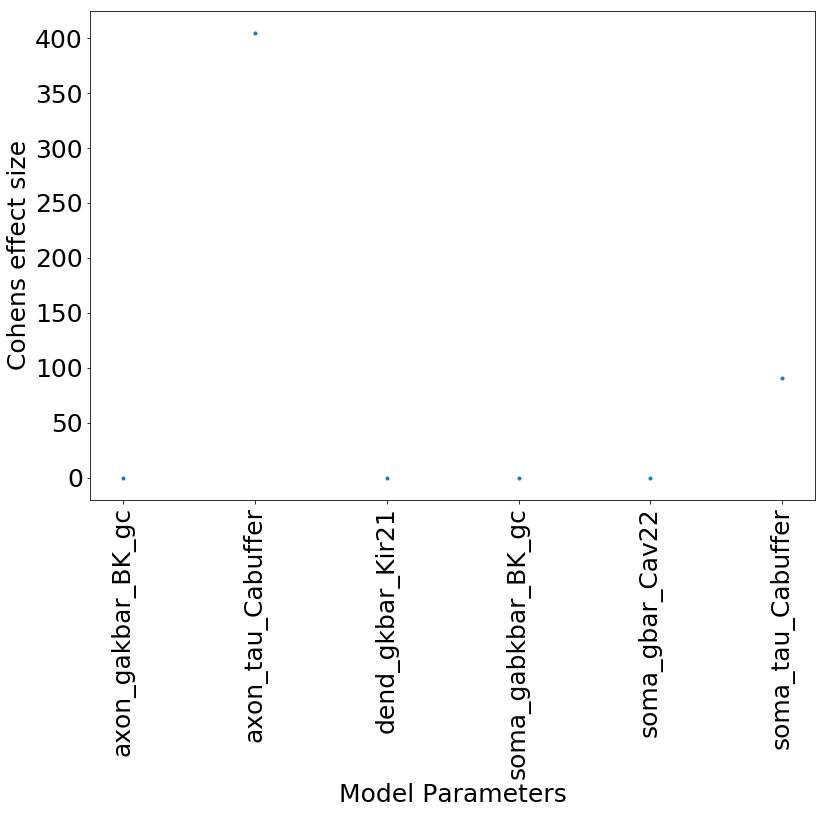

In [143]:

plt.plot(cohens_d,'.')
plt.xlabel('Model Parameters')
plt.ylabel('Cohens effect size')
plt.xticks(np.arange(len(cohens_d)), active_cond_keys, rotation = 'vertical')


# Save the dataset, feature and labels to csv

In [147]:

# save the data matrix to csv
np.savetxt('ALL_CONDUCTANCES_MODELS.csv',all_features, delimiter=" ")

# save the cell_type_labels
np.savetxt('ALL_CONDUCTANCES_MODELS_LABELS.csv',cell_type, delimiter=" ")

# save the cell_type names
#with open('ALL_CONDUCTANCES_MODELS_NAMES.csv', 'wb') as myfile:
#    wr = csv.writer(myfile, dialect='excel')
#    wr.writerow(cell_names)
with open('ALL_CONDUCTANCES_MODELS_NAMES.csv', 'wb') as myfile:
    wr = csv.writer(myfile)
    wr.writerow(cell_names)
    
# save the feature names
with open('ALL_CONDUCTANCES_MODELS_FEATURE_NAMES.csv', 'wb') as myfile:
    wr = csv.writer(myfile, dialect='excel')
    wr.writerow(feature_names)


# P-values analysis (Mann-Whithney test)

p_values:61 features
[3.38979125e-02 3.07288023e-02 6.58063131e-01 6.09575516e-01
 2.39645939e-01 3.53885175e-01 3.18962248e-03 2.28581476e-02
 3.15847899e-01 7.65282598e-01 9.45713516e-01 1.23094961e-02
 5.20763983e-01 7.39218372e-06 2.27017971e-02 7.89373190e-01
 3.69040502e-01 8.89448728e-04 3.23858081e-02 2.53144348e-03
 2.91240481e-01 5.10502086e-02 2.51354896e-01 1.03882086e-01
 2.01748188e-03 2.51354896e-01 4.33602530e-01 1.71642248e-02
 4.99251313e-01 2.02261316e-04 3.12700892e-19 8.60126131e-02
 8.76479208e-03 2.50237473e-02 3.46506084e-04 2.46696422e-03
 5.02583404e-01 8.64832019e-01 3.66255369e-01 1.71609737e-01
 6.52389254e-01 8.17733969e-01 2.52438805e-01 3.17555982e-02
 2.15447326e-01 2.85696266e-02 4.10892010e-01 4.29303810e-02
 1.15584623e-09 9.14909836e-06 1.04440098e-01 5.86831143e-03
 6.40918406e-02 2.31293451e-04 1.78270682e-01 1.74916546e-01
 5.57454461e-01 3.41264555e-03 8.76479208e-03 1.00374900e-03
 3.46506084e-04]


[30 48 13 49 29 53 34 60 17 59 24 35 19  6 57

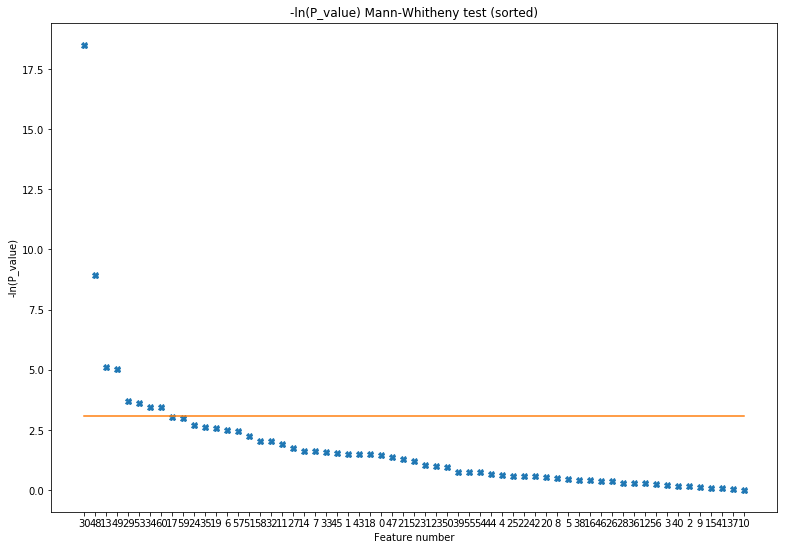

In [148]:
# p-values order is the same as in the matrix

print 'p_values:' +str(len(p_values)) +str(' features')
print p_values
print '\n'

# significance level
n_features=len(p_values)
p_level=0.05/(n_features)
sign_level=np.zeros(n_features)
sign_level[:]=-np.log10(p_level)
log_p=-np.log10(p_values) # initial log_p


plt.plot(np.arange(0,n_features,1),log_p[np.flip(np.argsort(-np.log10(p_values)),0)],'X',np.arange(0,n_features,1),sign_level)
plt.title('-ln(P_value) Mann-Whitheny test (sorted)')
plt.ylabel('-ln(P_value)')
plt.xlabel('Feature number')

# xticks
plt.xticks(np.arange(0,n_features,1),np.flip(np.argsort(-np.log10(p_values)),0))

print np.flip(np.argsort(-np.log10(p_values)),0)

p_values:61 features
[3.38979125e-02 3.07288023e-02 6.58063131e-01 6.09575516e-01
 2.39645939e-01 3.53885175e-01 3.18962248e-03 2.28581476e-02
 3.15847899e-01 7.65282598e-01 9.45713516e-01 1.23094961e-02
 5.20763983e-01 7.39218372e-06 2.27017971e-02 7.89373190e-01
 3.69040502e-01 8.89448728e-04 3.23858081e-02 2.53144348e-03
 2.91240481e-01 5.10502086e-02 2.51354896e-01 1.03882086e-01
 2.01748188e-03 2.51354896e-01 4.33602530e-01 1.71642248e-02
 4.99251313e-01 2.02261316e-04 3.12700892e-19 8.60126131e-02
 8.76479208e-03 2.50237473e-02 3.46506084e-04 2.46696422e-03
 5.02583404e-01 8.64832019e-01 3.66255369e-01 1.71609737e-01
 6.52389254e-01 8.17733969e-01 2.52438805e-01 3.17555982e-02
 2.15447326e-01 2.85696266e-02 4.10892010e-01 4.29303810e-02
 1.15584623e-09 9.14909836e-06 1.04440098e-01 5.86831143e-03
 6.40918406e-02 2.31293451e-04 1.78270682e-01 1.74916546e-01
 5.57454461e-01 3.41264555e-03 8.76479208e-03 1.00374900e-03
 3.46506084e-04]




Text(0.5,1,'-ln(P) Mann-Whithey test (unsorted)')

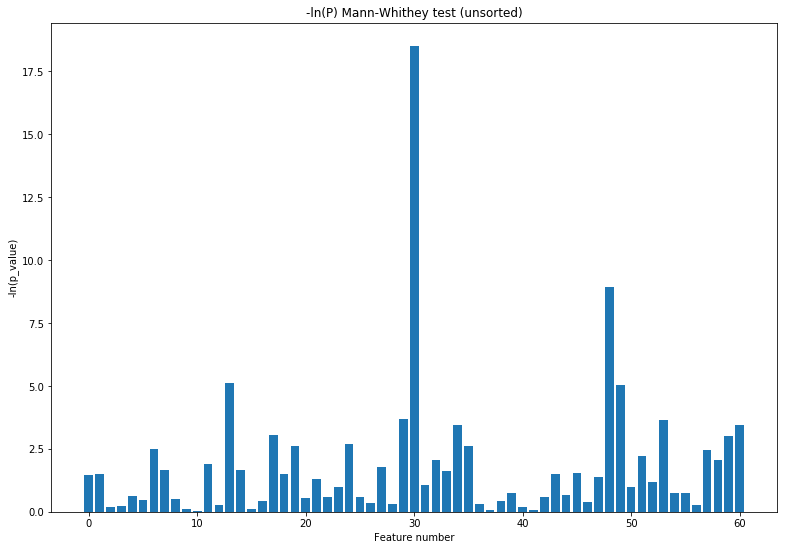

In [149]:
# PLOT p-values as a bar plot

# p-values order is different from all other features

print 'p_values:' +str(len(p_values)) +str(' features')
print p_values
print '\n'

# significance level
n_features=len(p_values)
p_level=0.05/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log10(p_level)
log_p=-np.log10(p_values) # initial log_p


plt.bar(np.arange(0,n_features,1),log_p)
plt.ylabel('-ln(p_value)')
plt.xlabel('Feature number')
plt.title('-ln(P) Mann-Whithey test (unsorted)')

# save figure to eps
#plt.savefig('all_features_KS_bonferoni.eps',format='eps',dpi=300)


p_values:61 features
[3.38979125e-02 3.07288023e-02 6.58063131e-01 6.09575516e-01
 2.39645939e-01 3.53885175e-01 3.18962248e-03 2.28581476e-02
 3.15847899e-01 7.65282598e-01 9.45713516e-01 1.23094961e-02
 5.20763983e-01 7.39218372e-06 2.27017971e-02 7.89373190e-01
 3.69040502e-01 8.89448728e-04 3.23858081e-02 2.53144348e-03
 2.91240481e-01 5.10502086e-02 2.51354896e-01 1.03882086e-01
 2.01748188e-03 2.51354896e-01 4.33602530e-01 1.71642248e-02
 4.99251313e-01 2.02261316e-04 3.12700892e-19 8.60126131e-02
 8.76479208e-03 2.50237473e-02 3.46506084e-04 2.46696422e-03
 5.02583404e-01 8.64832019e-01 3.66255369e-01 1.71609737e-01
 6.52389254e-01 8.17733969e-01 2.52438805e-01 3.17555982e-02
 2.15447326e-01 2.85696266e-02 4.10892010e-01 4.29303810e-02
 1.15584623e-09 9.14909836e-06 1.04440098e-01 5.86831143e-03
 6.40918406e-02 2.31293451e-04 1.78270682e-01 1.74916546e-01
 5.57454461e-01 3.41264555e-03 8.76479208e-03 1.00374900e-03
 3.46506084e-04]


Names of the important features:


axonal_Ra


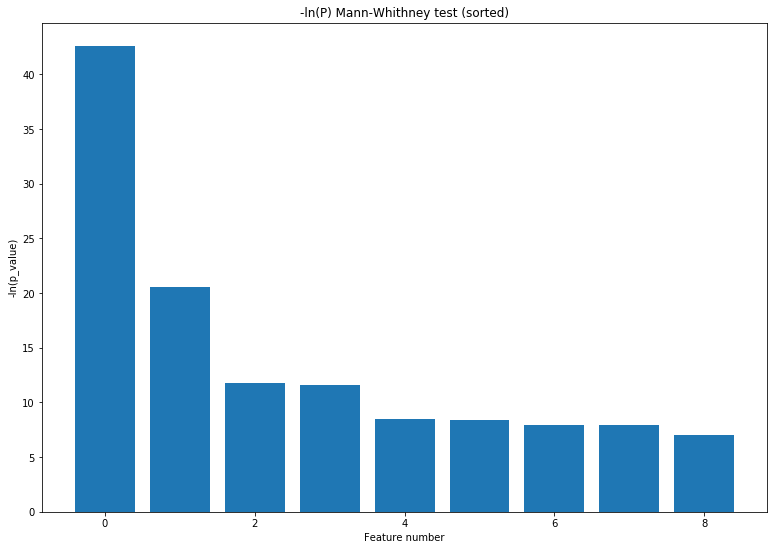

In [150]:
# show the most important features

# PLOT p-values as a bar plot, 10 most significant

# p-values order is different from all other features

print 'p_values:' +str(len(p_values)) +str(' features')
print p_values
print '\n'

# significance level
p_level=0.05/n_features
sign_level=np.zeros(n_features)
sign_level[:]=-np.log10(p_level)
log_p=-np.log(p_values) # initial log_p
# feature order
feature_order_idx=np.flip(np.argsort(-np.log10(p_values)),0)
feature_to_show=9


plt.bar(np.arange(0,feature_to_show,1),log_p[feature_order_idx[0:feature_to_show]])
plt.ylabel('-ln(p_value)')
plt.xlabel('Feature number')
plt.title('-ln(P) Mann-Whithney test (sorted)')

# show the feature order idx
print 'Names of the important features:'
print '\n'
for i in range(feature_to_show):
    print feature_names[feature_order_idx[i]]

# save figure to eps
#plt.savefig('all_features_KS_bonferoni_10most_significant.eps',format='eps',dpi=300)

# Scale features

Data length
240


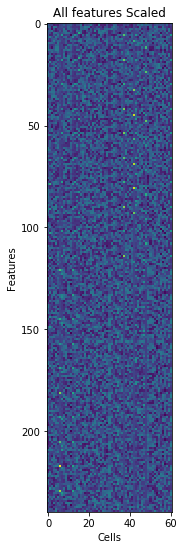

In [151]:
# Normalise all columns of the array
all_features_scaled = preprocessing.scale(all_features)

# show the normalised data
plt.imshow(all_features_scaled)
plt.title('All features Scaled')
plt.xlabel('Cells')
plt.ylabel('Features')

# show the length
print 'Data length'
print len(all_features_scaled)

# PCA of features

explained variance ratio (first two components): [0.08706926 0.0576804 ]


Text(0,0.5,'Principal component 2')

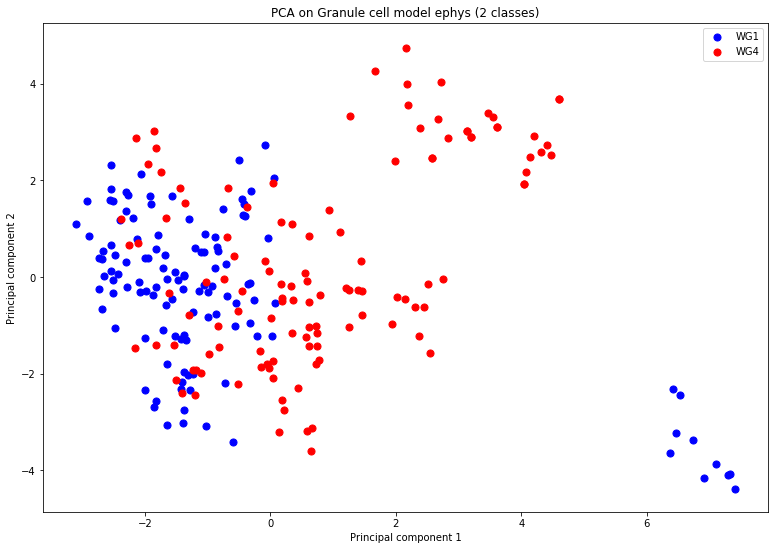

In [152]:
# Doing PCA on data with only 2 labels

pca = PCA(n_components=2)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_scaled).transform(all_features_scaled)


# create the cell type with only 2 classes
cell_type_14=cell_type

# print the variance explained
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# create the colors vectors
#colors = np.heaviside(cell_type-2,1)

# all indexes of WG
wg1_idx=np.zeros(1)
wg4_idx=np.zeros(1)
wg1_idx=np.where(cell_type_14==1)
wg4_idx=np.where(cell_type_14==4)

fig, ax = plt.subplots()

plt.scatter(X_r[wg1_idx, 0],X_r[wg1_idx, 1],c='blue',s=50)
plt.scatter(X_r[wg4_idx, 0],X_r[wg4_idx, 1],c='red',s=50)

plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA on Granule cell model ephys (2 classes)')
plt.legend(['WG1','WG4'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# save figure
#plt.savefig('PCA_WG1WG1TS_WG4.eps', format='eps', dpi=300)

# Show the PCA transformed data

Text(0,0.5,'Feature')

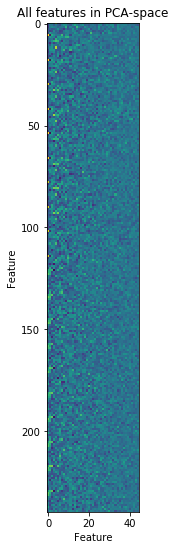

In [153]:

# plot the data in the same dimensionality space
pca = PCA(n_components=45)

# get the cell positions in the new coordinates
X_r = pca.fit(all_features_scaled).transform(all_features_scaled)

# show all features projected in the PCA space

plt.imshow(X_r)
plt.title('All features in PCA-space')
plt.xlabel('Feature')
plt.ylabel('Feature')


# Data analysis: Random forest classifier (all features)

Random forest classification score: 1.0


Random forest classification performance: 1.0
2 classes
Sum of feature importances: 1.0


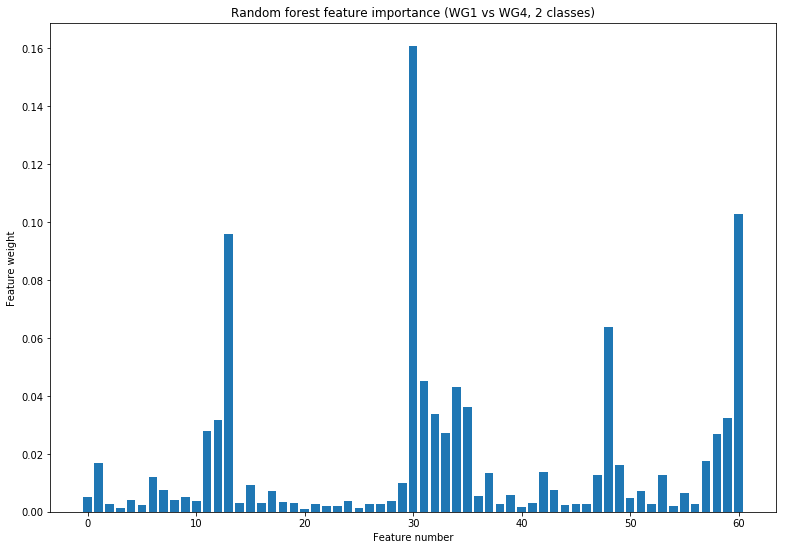

In [154]:
# do random forest classifier on original data

# CELL_TYPES FOR WG1+WG1TS, WG4


clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)

#RandomForestClassifier(max_depth=None, random_state=0)
clf.fit(all_features_scaled, cell_type_14)

# get the scores of the trees and pring them
scores = clf.score(all_features_scaled, cell_type_14)
print 'Random forest classification score: ' + str(scores)


oob_error = clf.oob_score_
print '\n'
print 'Random forest classification performance: ' + str(clf.oob_score_)

print '2 classes'
feature_importance=clf.feature_importances_

# [np.flip(np.argsort(feature_importance),0)]
plt.bar(np.arange(0,n_features,1), feature_importance)


plt.title('Random forest feature importance (WG1 vs WG4, 2 classes)')
plt.xlabel('Feature number')
plt.ylabel('Feature weight')

#plt.xticks(np.arange(0,n_features,1),np.flip(np.argsort(feature_importance),0))

print 'Sum of feature importances: ' + str(np.sum(clf.feature_importances_))

#print 'Order of features'
#print np.flip(np.argsort(feature_importance),0)

#plt.bar(np.arange(0,n_features,1),log_p)
#plt.savefig('Random_forest_WG1WG1TS_WG4_weights.eps', format='eps', dpi=300)

## Plot features accordingly

Names of the important features:


axonal_Ra
somatic_e_pas
apical_e_pas
soma_g_pas
axonal_cm
basal_cm
basal_e_pas
axonal_e_pas
somatic_cm
apical_cm
apical_Ra
basal_Ra
somatic_Ra
soma_tau_Cabuffer
apic_g_pas
soma_gabkbar_BK_gc
dend_gbar_HCN
dend_g_pas
soma_brat_Cabuffer
soma_gbar_Cav22


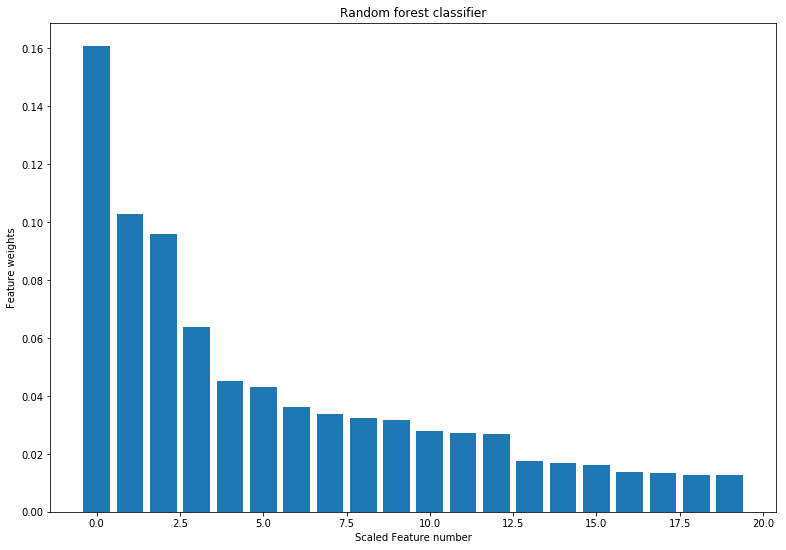

In [155]:

# show the feature importance of 10 most important features
# PLOT p-values as a bar plot, 10 most significant

# feature order
feature_order_idx=np.flip(np.argsort(feature_importance),0)
feature_to_show=20

plt.bar(np.arange(0,feature_to_show,1),feature_importance[feature_order_idx[0:feature_to_show]])
plt.ylabel('Feature weights')
plt.xlabel('Scaled Feature number')
plt.title('Random forest classifier')

# show the feature order idx
print 'Names of the important features:'
print '\n'
for i in range(feature_to_show):
    print feature_names[feature_order_idx[i]]

# save figure to eps
#plt.savefig('all_features_random_forest_10_largest.eps',format='eps',dpi=300)

# Show the random forest performance after 2 PCA

Classifier performance, PC1 & PC2 features only: 0.8083333333333333
('RandomForest with 200 estimators with features', [0, 1], 'has a score of', 1.0)


Text(0,0.5,'Principal component 2')

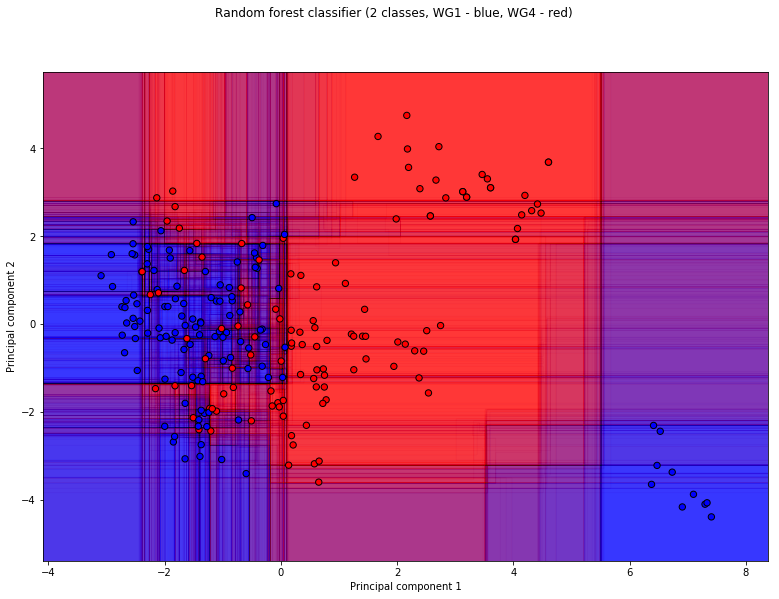

In [156]:
# Plot the decision boundary only for Random forest classifier


# Parameters
n_classes = 2
n_estimators = 200
cmap = plt.cm.RdYlBu
plot_step = 0.02  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration


model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=n_estimators, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)                    


pair=[0,1]

X = X_r[:, pair]
y = cell_type_14



# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Train
clf = clone(model)
clf = model.fit(X, y)

# get the scores of the trees
scores = clf.score(X, y)

# print the model score
print 'Classifier performance, PC1 & PC2 features only: ' + str(clf.oob_score_)

# Create a title for each column and the console by using str() and
# slicing away useless parts of the string
model_title = str(type(model)).split(
    ".")[-1][:-2][:-len("Classifier")]

model_details = model_title
if hasattr(model, "estimators_"):
    model_details += " with {} estimators".format(
        len(model.estimators_))
print(model_details + " with features", pair,
      "has a score of", scores)


# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Plot either a single DecisionTreeClassifier or alpha blend the
# decision surfaces of the ensemble of classifiers
if isinstance(model, DecisionTreeClassifier):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
else:
    # Choose alpha blend level with respect to the number
    # of estimators
    # that are in use (noting that AdaBoost can use fewer estimators
    # than its maximum if it achieves a good enough fit early on)
    estimator_alpha = 1.0 / len(model.estimators_)
    for tree in model.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=ListedColormap(['b','r']))

# Build a coarser grid to plot a set of ensemble classifications
# to show how these are different to what we see in the decision
# surfaces. These points are regularly space and do not have a
# black outline
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                 yy_coarser.ravel()]
                                 ).reshape(xx_coarser.shape)
#cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
#                        c=Z_points_coarser, cmap=cmap,
#                        edgecolors="none")

# Plot the training points, these are clustered together and have a blue-red outline


plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['b','r']),
            edgecolor='k', s=40)

plt.suptitle("Random forest classifier (2 classes, WG1 - blue, WG4 - red)")
plt.axis("tight")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

#plt.savefig('Random_forest_visualisation.svg', format='svg', dpi=300)

# tSNE representation of features of all models

Ephys dataset, perplexity=30 in 3 sec


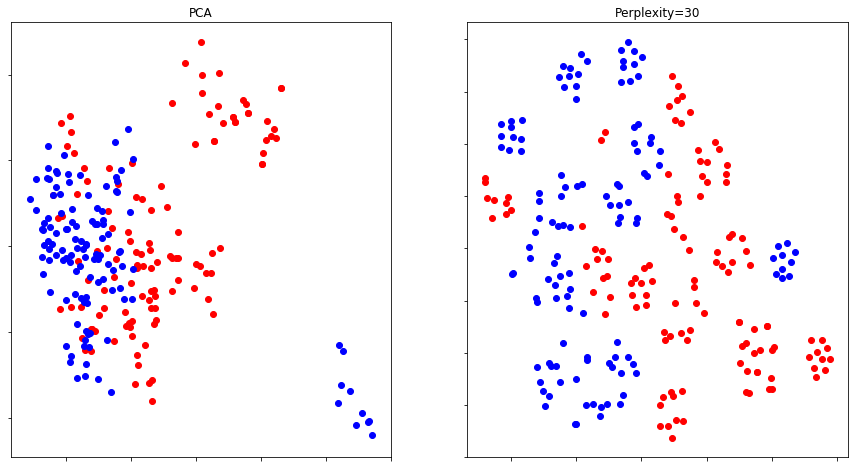

In [157]:
n_samples = 24

# t_SNE parameter, 2D vs 3D
n_components = 2

(fig, subplots) = plt.subplots(1, 2, figsize=(15, 8))
perplexities = [30]


X = all_features_scaled[:,:]
y = cell_type_14

pca = PCA(n_components=2)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_scaled).transform(all_features_scaled)


red = y == 4
blue = y == 1

ax = subplots[0]
ax.scatter(X_r[red, 0], X_r[red, 1], c="r")
ax.scatter(X_r[blue, 0], X_r[blue, 1], c="b")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
ax.set_title('PCA')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, metric='cosine',n_iter=20000)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("Ephys dataset, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[blue, 0], Y[blue, 1], c="b")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')

plt.show()

# Train random forest classifier based on tSNE data

Classifier performance, PC1 & PC2 features only: 0.9708333333333333
('RandomForest with 200 estimators with features', [0, 1], 'has a score of', 1.0)


Text(0,0.5,'Principal component 2')

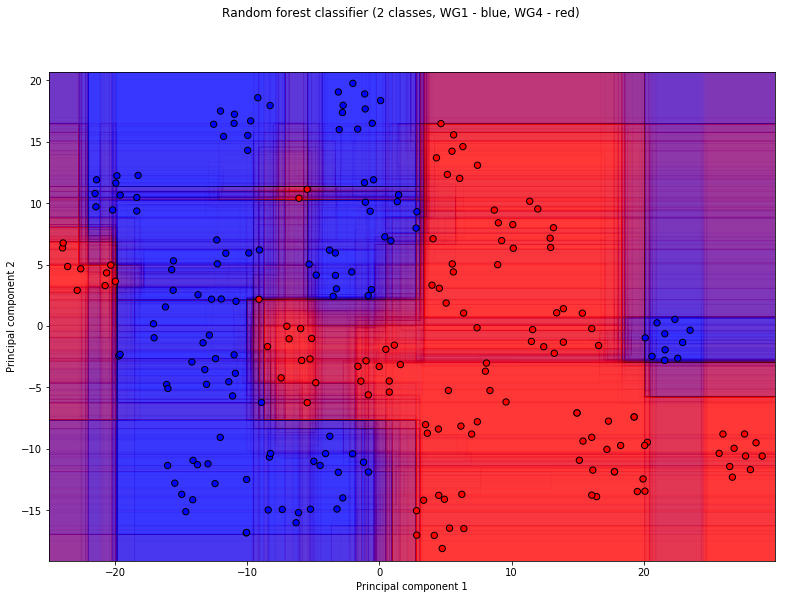

In [158]:
# Plot the decision boundary only for Random forest classifier


# Parameters
n_classes = 2
n_estimators = 200
cmap = plt.cm.RdYlBu
plot_step = 0.1  # fine step width for decision surface contours
plot_step_coarser = 0.5  # step widths for coarse classifier guesses
RANDOM_SEED = 13  # fix the seed on each iteration


model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=n_estimators, n_jobs=1,
            oob_score=True, random_state=0, verbose=0, warm_start=False)                    


pair=[0,1]

#X = Y[:, pair]
X=Y[:,pair]

y = cell_type_14



# Shuffle
idx = np.arange(X.shape[0])
np.random.seed(RANDOM_SEED)
np.random.shuffle(idx)
X = X[idx]
y = y[idx]

# Train
clf = clone(model)
clf = model.fit(X, y)

# get the scores of the trees
scores = clf.score(X, y)

# print the model score
print 'Classifier performance, PC1 & PC2 features only: ' + str(clf.oob_score_)

# Create a title for each column and the console by using str() and
# slicing away useless parts of the string
model_title = str(type(model)).split(
    ".")[-1][:-2][:-len("Classifier")]

model_details = model_title
if hasattr(model, "estimators_"):
    model_details += " with {} estimators".format(
        len(model.estimators_))
print(model_details + " with features", pair,
      "has a score of", scores)


# Now plot the decision boundary using a fine mesh as input to a
# filled contour plot
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

# Plot either a single DecisionTreeClassifier or alpha blend the
# decision surfaces of the ensemble of classifiers
if isinstance(model, DecisionTreeClassifier):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap)
else:
    # Choose alpha blend level with respect to the number
    # of estimators
    # that are in use (noting that AdaBoost can use fewer estimators
    # than its maximum if it achieves a good enough fit early on)
    estimator_alpha = 1.0 / len(model.estimators_)
    for tree in model.estimators_:
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=estimator_alpha, cmap=ListedColormap(['b','r']))

# Build a coarser grid to plot a set of ensemble classifications
# to show how these are different to what we see in the decision
# surfaces. These points are regularly space and do not have a
# black outline
xx_coarser, yy_coarser = np.meshgrid(
    np.arange(x_min, x_max, plot_step_coarser),
    np.arange(y_min, y_max, plot_step_coarser))
Z_points_coarser = model.predict(np.c_[xx_coarser.ravel(),
                                 yy_coarser.ravel()]
                                 ).reshape(xx_coarser.shape)
#cs_points = plt.scatter(xx_coarser, yy_coarser, s=15,
#                        c=Z_points_coarser, cmap=cmap,
#                        edgecolors="none")

# Plot the training points, these are clustered together and have a blue-red outline


plt.scatter(X[:, 0], X[:, 1], c=y,
            cmap=ListedColormap(['b','r']),
            edgecolor='k', s=40)

plt.suptitle("Random forest classifier (2 classes, WG1 - blue, WG4 - red)")
plt.axis("tight")
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

#plt.savefig('Random_forest_visualisation_tSNE.svg', format='svg', dpi=300)

### Compare PCA and tSNE by case

In [159]:

cell_type_case=np.array(cell_type_14)

# WG1 group

cell_type_case[0]=11
cell_type_case[1]=11
cell_type_case[2]=11
cell_type_case[3]=11
cell_type_case[4]=11
cell_type_case[5]=1
cell_type_case[6]=1
cell_type_case[7]=1
cell_type_case[8]=1
cell_type_case[9]=1
cell_type_case[10]=1
cell_type_case[11]=1


# WG4 group

step=12

cell_type_case[step]=2
cell_type_case[step+1]=2
cell_type_case[step+2]=2
cell_type_case[step+3]=2
cell_type_case[step+4]=2
cell_type_case[step+5]=22
cell_type_case[step+6]=22
cell_type_case[step+7]=22
cell_type_case[step+8]=22
cell_type_case[step+9]=22
cell_type_case[step+10]=22
cell_type_case[step+11]=22

print cell_type_case

[11. 11. 11. 11. 11.  1.  1.  1.  1.  1.  1.  1.  2.  2.  2.  2.  2. 22.
 22. 22. 22. 22. 22. 22.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.  4.
  4.  4.  4.  4.  4.  4.]


explained variance ratio (first two components): [0.08706926 0.0576804 ]


Text(0,0.5,'Principal component 2')

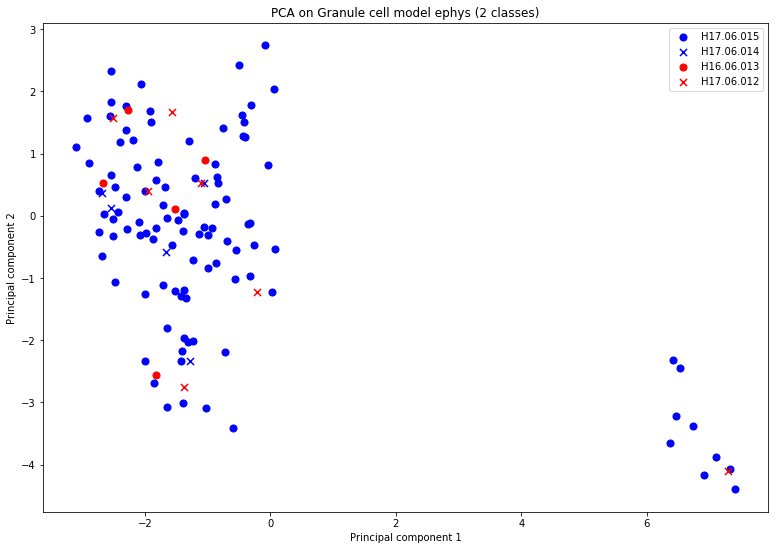

In [160]:
# Doing PCA on data with only 2 labels

pca = PCA(n_components=2)
# get the cell positions in the new coordinates
X_r = pca.fit(all_features_scaled).transform(all_features_scaled)

# print the variance explained
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

# create the colors vectors
#colors = np.heaviside(cell_type-2,1)

# all indexes of WG
g1_idx=np.zeros(1)
g11_idx=np.zeros(1)
g2_idx=np.zeros(1)
g22_idx=np.zeros(1)

g1_idx=np.where(cell_type_case==1)
g11_idx=np.where(cell_type_case==11)
g2_idx=np.where(cell_type_case==2)
g22_idx=np.where(cell_type_case==22)

fig, ax = plt.subplots()

plt.scatter(X_r[g1_idx, 0],X_r[g1_idx, 1],c='blue',s=50,marker='o')
plt.scatter(X_r[g11_idx, 0],X_r[g11_idx, 1],c='blue',s=50,marker='x')
plt.scatter(X_r[g2_idx, 0],X_r[g2_idx, 1],c='red',s=50,marker='o')
plt.scatter(X_r[g22_idx, 0],X_r[g22_idx, 1],c='red',s=50,marker='x')


plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA on Granule cell model ephys (2 classes)')
plt.legend(['H17.06.015','H17.06.014','H16.06.013','H17.06.012'])
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')

# save figure
#plt.savefig('PCA_WG1WG1TS_WG4.eps', format='eps', dpi=300)

## tSNE and PCA representation: data split by patients

Ephys dataset, perplexity=30 in 0.65 sec


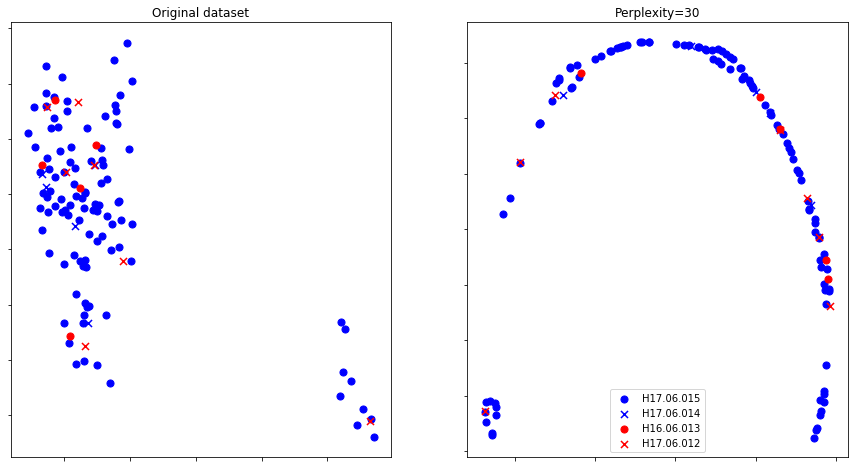

In [165]:
n_samples = 24

# t_SNE parameter, 2D vs 3D
n_components = 2

(fig, subplots) = plt.subplots(1, 2, figsize=(15, 8))
perplexities = [30]


#X = all_features_scaled[:,:]
X = X_r
y = cell_type_case

wg1 = y == 1
wg11 = y == 11
wg2 = y == 2
wg22 = y == 22

ax = subplots[0]
ax.scatter(X[wg1, 0], X[wg1, 1],c='blue',s=50,marker='o')
ax.scatter(X[wg11, 0], X[wg11, 1],c='blue',s=50,marker='x')
ax.scatter(X[wg2, 0], X[wg2, 1],c='red',s=50,marker='o')
ax.scatter(X[wg22, 0], X[wg22, 1],c='red',s=50,marker='x')

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
ax.set_title('Original dataset')

for i, perplexity in enumerate(perplexities):
    ax = subplots[i + 1]

    t0 = time()
    tsne = manifold.TSNE(n_components=n_components, init='random',
                         random_state=0, perplexity=perplexity, metric='cosine',n_iter=6000)
    Y = tsne.fit_transform(X)
    t1 = time()
    print("Ephys dataset, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[wg1, 0], Y[wg1, 1],c='blue',s=50,marker='o')
    ax.scatter(Y[wg11, 0], Y[wg11, 1],c='blue',s=50,marker='x')
    ax.scatter(Y[wg2, 0], Y[wg2, 1],c='red',s=50,marker='o')
    ax.scatter(Y[wg22, 0], Y[wg22, 1],c='red',s=50,marker='x')        
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
    ax.legend(['H17.06.015','H17.06.014','H16.06.013','H17.06.012'])

#plt.show()

#plt.savefig('tSNE_PCA.eps', format='eps', dpi=300)